# An Visual Analysis of Covid-19 Cases Ontario
**Alexei Marcilio**<br>
April9,2020
<br>
<br>
The government of Ontario provides compiled data from public health units on confirmed positive cases of COVID-19.
I am using that data to produce a quick visualization of the number of cases and fatalities in Ontario. There's only a few columns available, including an age range, the outcome, and the reporting city so there's no value in 
doing any machine learning analysis. 

The data can be found here:

https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
# required python3 -m pip install seaborn
import seaborn as sns

In [3]:
# Import data
data = pd.read_csv("covid.csv")

## Cases by age

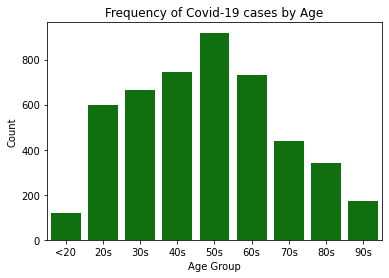

In [4]:
# pandas dataframe
df = pd.DataFrame(data)
isknown = df['Age_Group'] != 'Unknown'
# Sort Age Groups ~ categorical
df['Age_Group'] = pd.Categorical(
    df['Age_Group'],
    ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
df = df[isknown].sort_values(['Age_Group'])
df['Age_Group'] = df['Age_Group'].astype('category')
fig = sns.countplot(df['Age_Group'], color='green')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 cases by Age");

If we look at cases by age we can see that the distribution roughly follows the age distribution of Ontario residents. The median age in Ontario is about 40, and it looks like that's approximately the median age of people with covid-19. This might indicate it does discriminate about who gets infected.

## Cases by Gender 

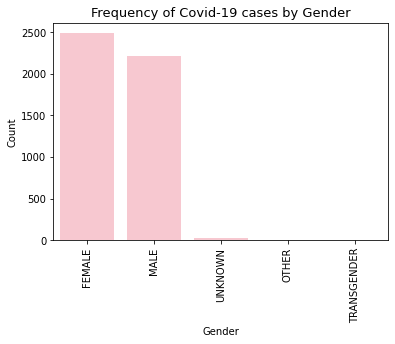

In [5]:
fig = sns.countplot(df['CLIENT_GENDER'], color='pink', \
                    order = df['CLIENT_GENDER'].value_counts().index)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 cases by Gender",  fontsize=13)
plt.xticks(rotation=90);

The number of cases are pretty evenly distributed between males and females.

## Cases by City

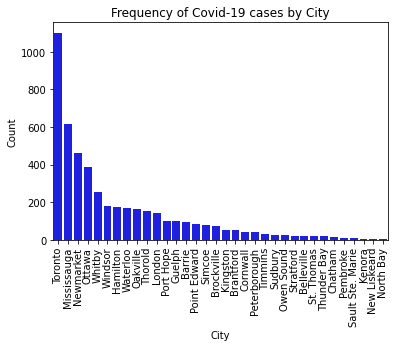

In [6]:
fig = sns.countplot(df['Reporting_PHU_City'], color='blue', \
                    order = df['Reporting_PHU_City'].value_counts().index)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 cases by City")
plt.xticks(rotation=90);

It's no surprise that Toronto has the most Covid-19 cases, but it does not nearly have the most cases per capita. Newmarket has the third most number of cases, more than Ottawa, a city that is ten times its size.

## Fatalities by Age

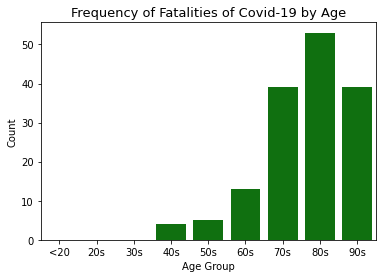

In [7]:
is_fatal = df['OUTCOME1'] == 'Fatal'
dfFatal = df[is_fatal]
fig = sns.countplot(dfFatal['Age_Group'], color='green')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Frequency of Fatalities of Covid-19 by Age", fontsize=13);

The vast majority of deaths are of people over 70. There have been no fatalities in Ontario for those under 40.

## Fatalities by Gender

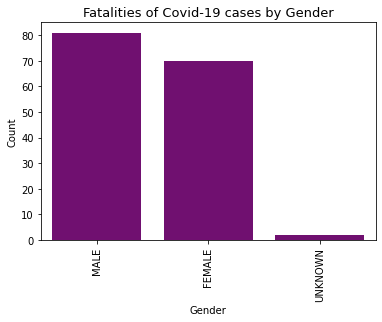

In [8]:
fig = sns.countplot(dfFatal['CLIENT_GENDER'], color='purple', \
                    order = dfFatal['CLIENT_GENDER'].value_counts().index)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Fatalities of Covid-19 cases by Gender",  fontsize=13)
plt.xticks(rotation=90);

We can see that slightly more males died from Covid-19 than females despite there being more female cases.

## Fatalities by City


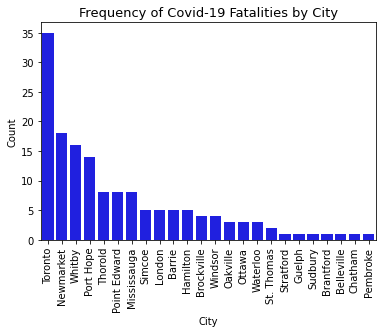

In [9]:
fig = sns.countplot(dfFatal['Reporting_PHU_City'], color='blue', \
                    order = dfFatal['Reporting_PHU_City'].value_counts().index)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 Fatalities by City", fontsize=13)
plt.xticks(rotation=90);

Toronto has the most fatalities, but certainly not the most per capita. Newmarket is a hotspot with the second highest number of fatalities in Ontario despite having less than 100,000 people.

## Cases over Time

In [10]:
# Convert string to date
df['ACCURATE_EPISODE_DATE'] = pd.to_datetime(df['ACCURATE_EPISODE_DATE'])

### Cases by Date

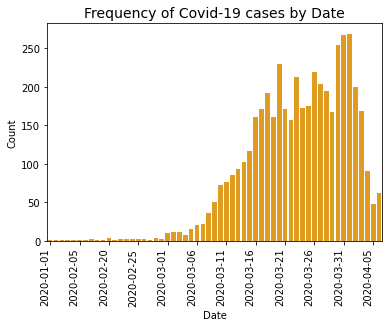

In [11]:
fig = sns.countplot(df['ACCURATE_EPISODE_DATE'], color='orange')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 cases by Date", fontsize=14)
plt.xticks(rotation=90)
x_dates = df['ACCURATE_EPISODE_DATE'].dt.strftime(
    '%Y-%m-%d').sort_values().unique()
fig.set_xticklabels(labels=x_dates, rotation=90, ha='right')
new_ticks = [i.get_text() for i in fig.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5]);

It's hard to say if the number of cases are leveling off. The steep decline in numbers is probably due to a backlog in updated the government data website.

### Fatalities by Date

In [12]:
# Add column for fatal: 1,0
df['Fatal'] = df['OUTCOME1'].apply(lambda x: 1 if x == 'Fatal' else 0)

df['ACCURATE_EPISODE_DATE'] = pd.to_datetime(df['ACCURATE_EPISODE_DATE']).dt.date

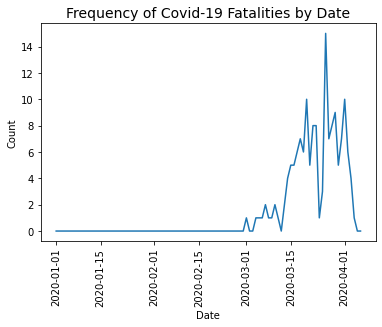

In [13]:
g = df.groupby(['ACCURATE_EPISODE_DATE'])['Fatal'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Frequency of Covid-19 Fatalities by Date", fontsize=14)
plt.xticks(rotation=90);

The spike in fatalities levels off, which is probably due to latency in the government data. There has also been news about a backlog of tests, and this could be reason for this apparent decline.

### Heatmap of Cases by City over Time

In [ ]:
grouped_cases = df.groupby(['Reporting_PHU_City', 'ACCURATE_EPISODE_DATE'
                               ]).agg({'ROW_ID': ['count']})

grouped_cases.columns = ['TotalCases']
grouped_cases = grouped_cases.reset_index()

In [ ]:
# Build Heatmap
grouped_cases.columns = ['City', 'Date', 'TotalCases']

#Pivot table for heatmap
heatmap1_data = pd.pivot_table(grouped_cases,
                               values='TotalCases',
                               index=['City'],
                               columns='Date',
                               fill_value=0)

#heatmap1_data['Date'] = pd.heatmap1_data(df['Date']).dt.date

#heatmap1_data['Date'] = heatmap1_data.Date.astype('string')
plt.subplots(figsize=(10, 12))
ax = sns.heatmap(heatmap1_data,
                 annot=False,
                 fmt="d",
                 linewidths=0,
                 cmap="OrRd")

ax.set_title('Heatmap of Covid-19 Cases by City', fontsize=14);

There's a clear increase in cases over time, with some cities such as Toronto and Mississauga showing large increases more recently. 

It's likely that the decrease in cases in the most recent days are due to a delay by the government in posting the data.

### Heatmap of Fatalities by City over Time

In [ ]:
#g = df.groupby(['Reporting_PHU_City','ACCURATE_EPISODE_DATE'])['Fatal'].sum()

In [ ]:
# Aggregate columns
grouped_multiple = df.groupby(['Reporting_PHU_City', 'ACCURATE_EPISODE_DATE'
                               ]).agg({'Fatal': ['sum']})
grouped_multiple.columns = ['totalFatal']
grouped_multiple = grouped_multiple.reset_index()

In [ ]:
# Rename columns
grouped_multiple.columns = ['City', 'Date', 'Fatalities']
#Pivot table for heatmap
heatmap1_data = pd.pivot_table(grouped_multiple,
                               values='Fatalities',
                               index=['City'],
                               columns='Date',
                               fill_value=0)
plt.subplots(figsize=(10, 12))
#ax.set_xticklabels(heatmap1_data['Date'].dt.strftime('%Y-%m-%d'))

ax = sns.heatmap(heatmap1_data,
                 annot=False,
                 fmt="d",
                 linewidths=0,
                 cmap="OrRd")
ax.set_title('Heatmap of Covid-19 Fatalities by City', fontsize=14);

The heatmap above shows the progression of fatalities over time. 

We can see that some cities had a fatality, and then no more followed, such as Stratford, and other cities such as Newmarket show an increase in fatalities.